# Joomi Shim

## Research question/interests

Medical expense dataset includes many interesting factors such as smoking status that affect the the amount of personal charges. I think it will be intriguing to find out the correlation between each factor and the causes of high charges to prevent high medical expenses in the future.

To what extent would the factors in the dataset affect the personal medical expense?

In [230]:
#setup
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

**Import Data**

In [231]:
df = pd.read_csv('../data/raw/insurance_raw1.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Milestone 3

### Task 1

#### Exploratory Data Analysis:

In [232]:
print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (1338, 7)
Columns in the dataset: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [233]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [234]:
df.nunique(axis=0)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [235]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Correlation Matrix


<AxesSubplot:>

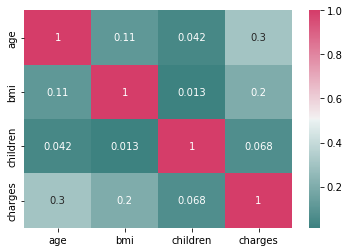

In [236]:
print("Correlation Matrix")
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(190, 0, as_cmap=True))

Coefficient '1' stands for perfect correlation and '0' stands for no correlation (= random). The correlation matrix above shows that there are weak positive relationships among charges and other variables. 

Most coefficients are close to 0, meaning that there are relatively low relationships between the variables. Between charges and age, and charges and bmi, however, you can observe positive correlation of 0.3 and 0.2 respectively.

In [237]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [238]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


<AxesSubplot:xlabel='age', ylabel='bmi'>

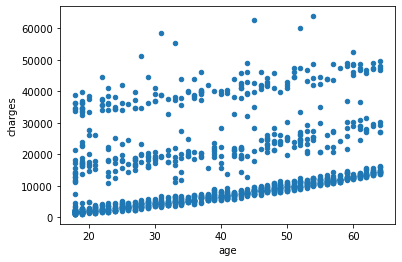

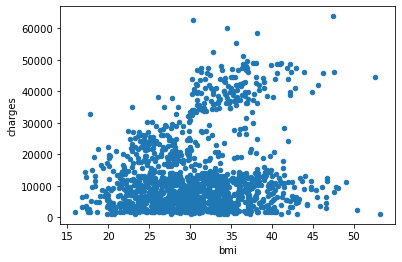

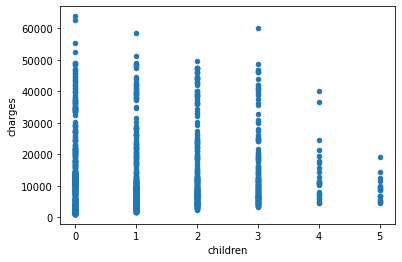

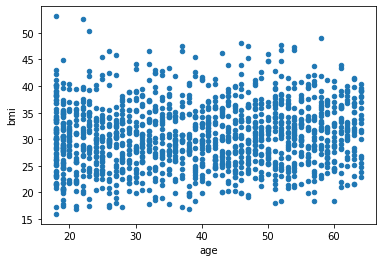

In [239]:
df.plot(kind='scatter', x='age', y='charges')
df.plot(kind='scatter', x='bmi', y='charges')
df.plot(kind='scatter', x='children', y='charges')
df.plot(kind='scatter', x='age', y='bmi')

<AxesSubplot:>

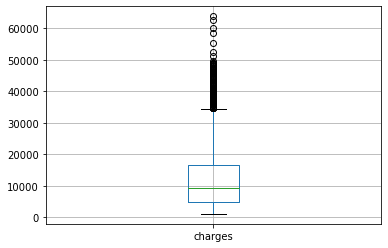

In [240]:
df.boxplot('charges')

From the boxplot above, you can see that there are a number of outliers for charges in the upper range and that most of the charges fall between 0 and $35,000.

<AxesSubplot:ylabel='Frequency'>

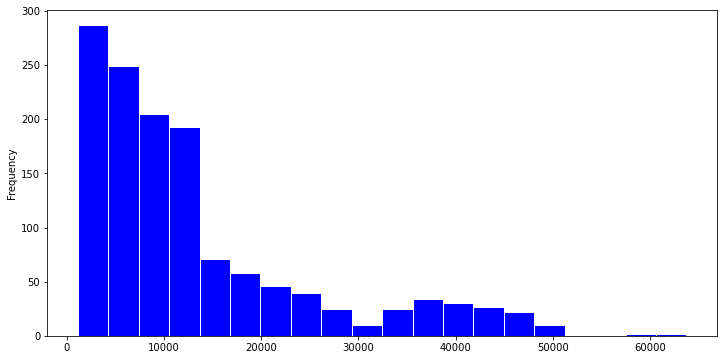

In [256]:
df['charges'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='blue',edgecolor='white')

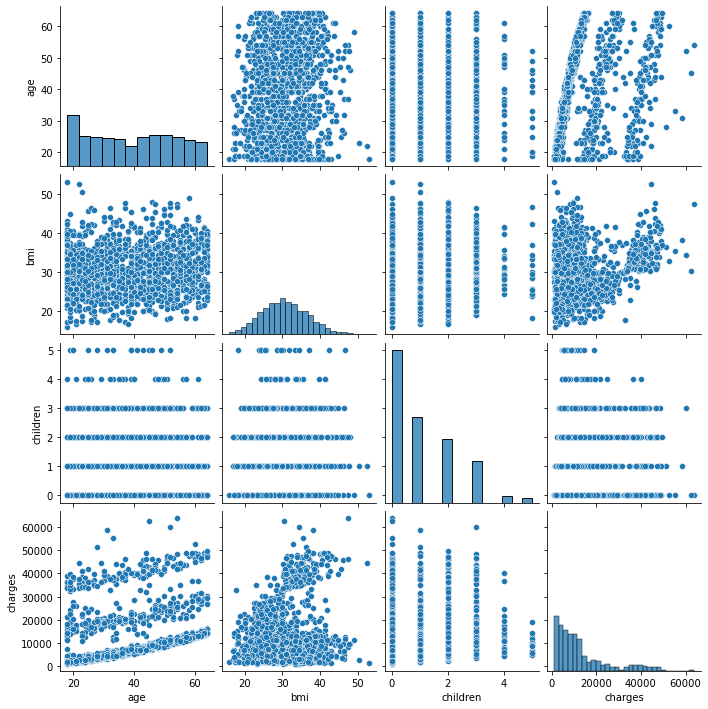

In [242]:
sns.pairplot(df)

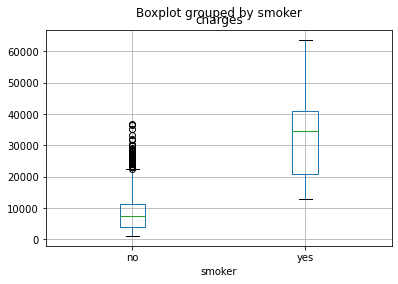

In [162]:
boxplot = df.boxplot(column=['charges'],by="smoker")
boxplot.plot()
plt.show()

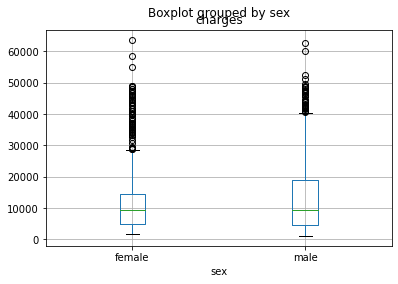

In [247]:
boxplot = df.boxplot(column=['charges'],by="sex")
boxplot.plot()
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

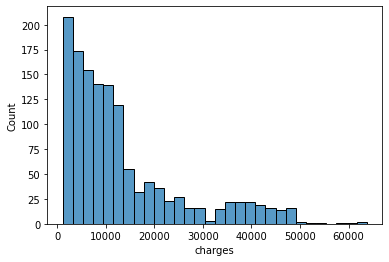

In [260]:
sns.histplot(df['charges'])

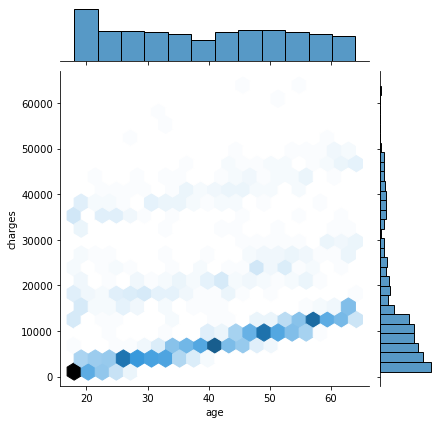

In [267]:
sns.jointplot(x='age',y='charges', data = df, kind = 'hex')

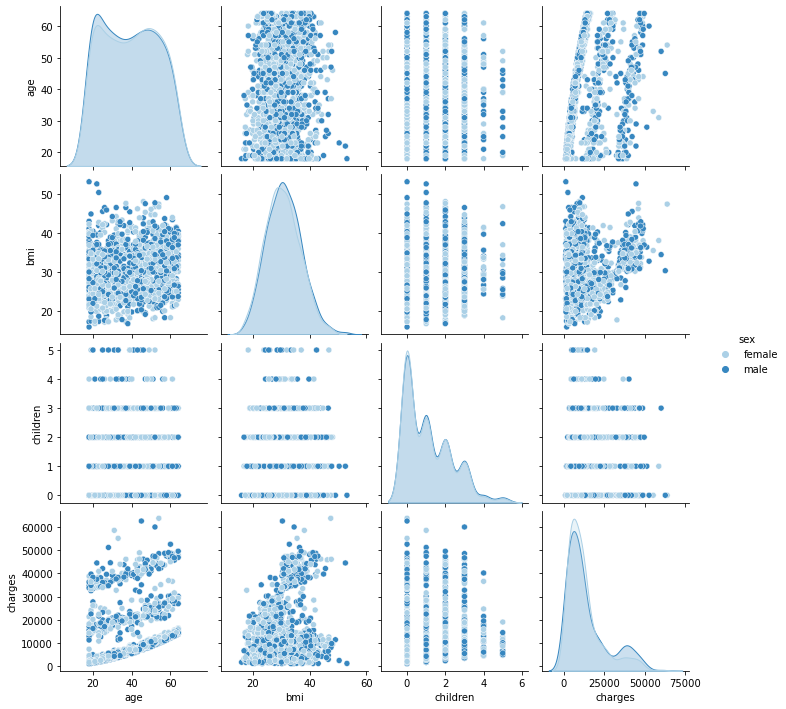

In [268]:
sns.pairplot(df, hue='sex',palette='Blues')

## Task 2 & 3

In [219]:
import projectfunction1 as p1
import statistics as st

#### Analysis Pipeline

##### 1. Load Data

In [274]:
data ='../data/raw/insurance_raw1.csv'
dfu = p1.unprocessed(data)
dfu

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [280]:
dfp = p1.load_and_process(data)
dfp

,age,sex,bmi,smoker,charges
1248,18,female,39.820,no,1633.96180
482,18,female,31.350,no,1622.18850
492,18,female,25.080,no,2196.47320
525,18,female,33.880,no,11482.63485
529,18,male,25.460,no,1708.00140
...,...,...,...,...,...
398,64,male,25.600,no,14988.43200
335,64,male,34.500,no,13822.80300
378,64,female,30.115,no,16455.70785
1265,64,male,23.760,yes,26926.51440


In [221]:
data ='../data/raw/insurance_raw1.csv'
dfu = p1.unprocess(data)
st.mean(dfu["charges"])
condition1 = dfu['sex'] == "male"
print(st.mean(dfu.loc[condition1, 'charges']))
condition2 = dfu['sex'] == "female"
print(st.mean(dfu.loc[condition2, 'charges']))

13956.751177721893
12569.578843835347


In [215]:
for i in range(18,64):
    print("Mean charge for age ",i," ",st.mean(dfu['charges'][(dfu["age"] == i)]))

Mean charge for age  18   7086.217556362319
Mean charge for age  19   9747.909334558823
Mean charge for age  20   10159.697736206897
Mean charge for age  21   4730.464329642857
Mean charge for age  22   10012.932801785715
Mean charge for age  23   12419.820039642856
Mean charge for age  24   10648.015962142857
Mean charge for age  25   9838.365310714285
Mean charge for age  26   6133.825308571429
Mean charge for age  27   12184.701721428572
Mean charge for age  28   9069.187564285714
Mean charge for age  29   10430.158727037036
Mean charge for age  30   12719.110358148147
Mean charge for age  31   10196.980573333334
Mean charge for age  32   9220.300290769232
Mean charge for age  33   12351.532987307692
Mean charge for age  34   11613.528120769231
Mean charge for age  35   11307.1820312
Mean charge for age  36   12204.476138
Mean charge for age  37   18019.9118772
Mean charge for age  38   8102.733674
Mean charge for age  39   11778.2429452
Mean charge for age  40   11772.25131
Mean ch